**Import test set that i just prepared for the model evaluation from process.py file**

In [1]:
import preprocess as pp

  (0, 78)	1


In [2]:
X1_test = pp.BOWtcas_test
y1_test = pp.ytcas_test

X2_test = pp.BOWdf_test
y2_test = pp.ydf_test

**Import model pipeline that i just trained and save them for the model evaluation from joblib library**

In [3]:
import joblib

In [4]:
# Load the trained pipeline from the file that i just saved
lr_pipeline = joblib.load('best_lr_pipeline.pkl')
nb_pipeline = joblib.load('best_nb_pipeline.pkl')
rf_pipeline = joblib.load('best_rf_pipeline.pkl')
xg_pipeline = joblib.load('best_xg_pipeline.pkl')
nn_pipeline = joblib.load('best_nn_pipeline.pkl')

lrc_pipeline = joblib.load('best_lrc_pipeline.pkl')
nbc_pipeline = joblib.load('best_nbc_pipeline.pkl')
rfc_pipeline = joblib.load('best_rfc_pipeline.pkl')
xgc_pipeline = joblib.load('best_xgc_pipeline.pkl')
nnc_pipeline = joblib.load('best_nnc_pipeline.pkl')


# **Evaluation**

let's see classification report

In [5]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

---------------------------------------------------------------------------------------------------------------------------------------

* tcas test set

In [6]:
lr_preds = lr_pipeline.predict(X1_test)
nb_preds = nb_pipeline.predict(X1_test)
rf_preds = rf_pipeline.predict(X1_test)
xg_preds = xg_pipeline.predict(X1_test)
nn_preds = nn_pipeline.predict(X1_test)

In [7]:
# Classification report for Logistic Regression
lr_classification_report = classification_report(y1_test, lr_preds)

# Classification report for Naive Bayes
nb_classification_report = classification_report(y1_test, nb_preds)

# Classification report for Random Forest
rf_classification_report = classification_report(y1_test, rf_preds)

# Classification report for XGBoost
xg_classification_report = classification_report(y1_test, xg_preds)

# Classification report for Neural Networks
nn_classification_report = classification_report(y1_test, nn_preds)

In [8]:
# Show classification reports
print("Logistic Regression:")
print(lr_classification_report)

print("\nNaive Bayes:")
print(nb_classification_report)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25


Naive Bayes:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0.84      0.83        25



In [9]:
print("\nRandom Forest:")
print(rf_classification_report)

print("\nXGBoost:")
print(xg_classification_report)

print("\nNeural Networks:")
print(nn_classification_report)


Random Forest:
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        13
           1       1.00      0.58      0.74        12

    accuracy                           0.80        25
   macro avg       0.86      0.79      0.79        25
weighted avg       0.86      0.80      0.79        25


XGBoost:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.90      0.75      0.82        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25


Neural Networks:
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weighted avg       0.88      0

# **Scores Visualization**

**Visualize them for easy to understand**

In [10]:
models = ['LR', 'NB', 'RF', 'XG', 'NN']
metrics = ['Accuracy', 'Precision', 'Rcall', 'F1 Score']

In [11]:
acc_scores = []
pre_scores = []
re_scores = []
f1_scores = []

loaded_pipelines = {
    'LR': lr_pipeline,
    'NB': nb_pipeline,
    'RF': rf_pipeline,
    'XG': xg_pipeline,
    'NN': nn_pipeline
}

for model in models:
    pipeline = loaded_pipelines[model]
    predictions = pipeline.predict(X1_test)
    classification_rep = classification_report(y1_test, predictions, output_dict=True)
    acc_scores.append(classification_rep['accuracy'])
    pre_scores.append(classification_rep['macro avg']['precision'])
    re_scores.append(classification_rep['macro avg']['recall'])
    f1_scores.append(classification_rep['macro avg']['f1-score'])

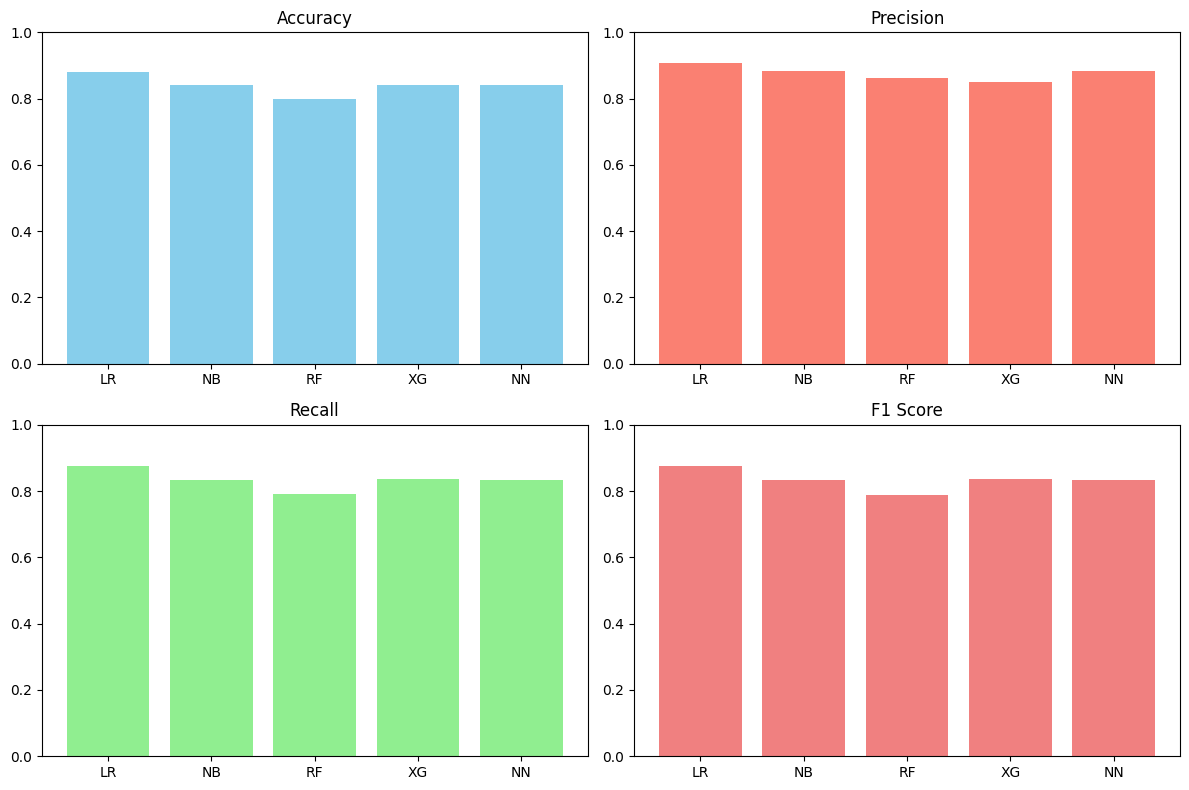

In [12]:
# Create subplots for each performance metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot accuracy scores
axes[0, 0].bar(models, acc_scores, color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

# Plot precision scores
axes[0, 1].bar(models, pre_scores, color='salmon')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)

# Plot recall scores
axes[1, 0].bar(models, re_scores, color='lightgreen')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)

# Plot F1 scores
axes[1, 1].bar(models, f1_scores, color='lightcoral')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------

* combined test set

In [13]:
lrc_preds = lrc_pipeline.predict(X2_test)
nbc_preds = nbc_pipeline.predict(X2_test)
rfc_preds = rfc_pipeline.predict(X2_test)
xgc_preds = xgc_pipeline.predict(X2_test)
nnc_preds = nnc_pipeline.predict(X2_test)

In [14]:
# Classification report for Logistic Regression
lrc_classification_report = classification_report(y2_test, lrc_preds)

# Classification report for Naive Bayes
nbc_classification_report = classification_report(y2_test, nbc_preds)

# Classification report for Random Forest
rfc_classification_report = classification_report(y2_test, rfc_preds)

# Classification report for XGBoost
xgc_classification_report = classification_report(y2_test, xgc_preds)

# Classification report for Neural Networks
nnc_classification_report = classification_report(y2_test, nnc_preds)

In [15]:
# Show classification reports
print("Logistic Regression (c):")
print(lrc_classification_report)

print("\nNaive Bayes (c):")
print(nbc_classification_report)

Logistic Regression (c):
              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.93      0.79      0.86        34

    accuracy                           0.87        69
   macro avg       0.88      0.87      0.87        69
weighted avg       0.88      0.87      0.87        69


Naive Bayes (c):
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        35
           1       1.00      0.65      0.79        34

    accuracy                           0.83        69
   macro avg       0.87      0.82      0.82        69
weighted avg       0.87      0.83      0.82        69



In [16]:
print("\nRandom Forest (c):")
print(rfc_classification_report)

print("\nXGBoost (c):")
print(xgc_classification_report)

print("\nNeural Networks (c):")
print(nnc_classification_report)


Random Forest (c):
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        35
           1       0.96      0.65      0.77        34

    accuracy                           0.81        69
   macro avg       0.85      0.81      0.81        69
weighted avg       0.85      0.81      0.81        69


XGBoost (c):
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.91      0.59      0.71        34

    accuracy                           0.77        69
   macro avg       0.81      0.77      0.76        69
weighted avg       0.80      0.77      0.76        69


Neural Networks (c):
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        35
           1       0.87      0.79      0.83        34

    accuracy                           0.84        69
   macro avg       0.84      0.84      0.84        69
weighted avg      

In [17]:
models_c = ['LR(c)', 'NB(c)', 'RF(c)', 'XG(c)', 'NN(c)']
metrics_c = ['Accuracy', 'Precision', 'Rcall', 'F1 Score']

In [18]:
acc_scores_c = []
pre_scores_c = []
re_scores_c = []
f1_scores_c = []

loaded_pipelines = {
    'LR(c)': lrc_pipeline,
    'NB(c)': nbc_pipeline,
    'RF(c)': rfc_pipeline,
    'XG(c)': xgc_pipeline,
    'NN(c)': nnc_pipeline
}

for model in models_c:
    pipeline_c = loaded_pipelines[model]
    predictions = pipeline_c.predict(X2_test)
    classification_rep = classification_report(y2_test, predictions, output_dict=True)
    acc_scores_c.append(classification_rep['accuracy'])
    pre_scores_c.append(classification_rep['macro avg']['precision'])
    re_scores_c.append(classification_rep['macro avg']['recall'])
    f1_scores_c.append(classification_rep['macro avg']['f1-score'])

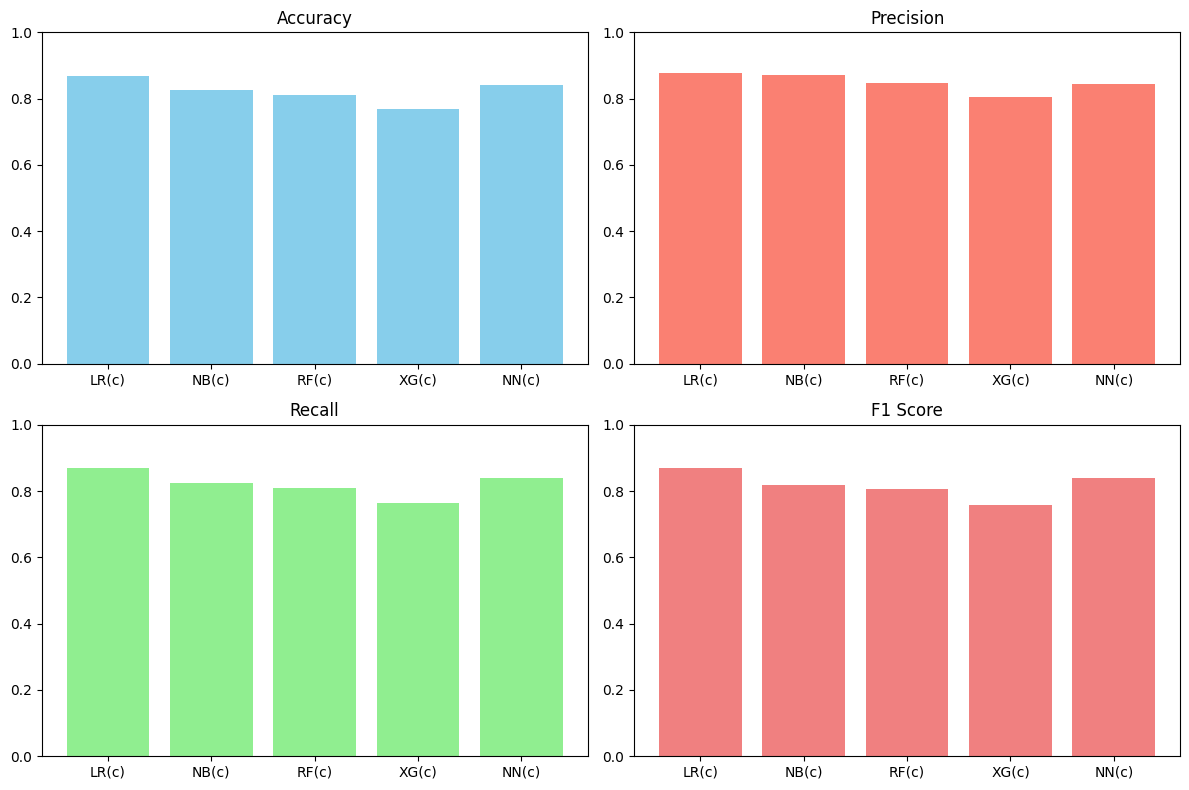

In [19]:
# Create subplots for each performance metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot accuracy scores
axes[0, 0].bar(models_c, acc_scores_c, color='skyblue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

# Plot precision scores
axes[0, 1].bar(models_c, pre_scores_c, color='salmon')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)

# Plot recall scores
axes[1, 0].bar(models_c, re_scores_c, color='lightgreen')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)

# Plot F1 scores
axes[1, 1].bar(models_c, f1_scores_c, color='lightcoral')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_ylim(0, 1)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

*Test predictions*

In [20]:
from preprocess import n2_process

In [25]:
new_sentence = "สวัสดีเช้า วันนี้อากาศแย่มาก"
print(n2_process(new_sentence))

  (0, 695)	1
  (0, 741)	1
  (0, 866)	1
  (0, 1126)	1


In [26]:
lrc_pipeline.predict(n2_process(new_sentence))

array([0], dtype=int64)